In [1]:
import pandas as pnds #importing pandas as pnds for data manipulation.
from sklearn.preprocessing import LabelEncoder #imported the lable encoder for converting the categorical data into numerical
from sklearn.model_selection import train_test_split #imported the train test split module from sklearn model selection for spliting the dataset into training and testing
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments #imported the module from transformer for tokenization, model loading, and training with hugginh face transformer.
import torch #imported the pytorch module for building and training and training neural networks.
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings("ignore")

# Download NLTK data (only the first time)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
#loading the dataset using pandas module, getted the dataset from hugging face.
MLData = pnds.read_csv("hf://datasets/TungHamHoc/sentiment-mental-health/sentiment-mental-health.csv")

In [3]:
MLData.head()

,statement,status
0,Health anxiety taking over my life Since I got...,Anxiety
1,Bladder cancer and heart disease I'm 26 I kno ...,Anxiety
2,"Might take a while to get my meds, what can I ...",Anxiety
3,anxiety over leg numbness so i've had cripplin...,Anxiety
4,"Inhalated AC/refrigerant chemicals Today, I wa...",Anxiety


In [4]:
MLData['status'].unique()

array(['Anxiety', 'Depression', 'Normal', 'Suicidal'], dtype=object)

In [5]:
MLData['status'].value_counts()

,count
status,
Normal,408
Depression,385
Suicidal,266
Anxiety,194


In [6]:
MLData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   statement  1251 non-null   object
 1   status     1253 non-null   object
dtypes: object(2)
memory usage: 19.7+ KB


In [7]:
MLData['statement'][0]

'Health anxiety taking over my life Since I got the flu this year, I’ve been constantly worrying about my health. I wake up in a panic every day. I am constantly worrying that I’m losing my vision or that I have MS, brain tumor, etc. I’ve gotten blood work that all came back perfect. I’m only a teenager but these worries are controlling me all the time. I’ve been on medication for a month and a half and started seeing a therapist a couple of weeks ago but it still isn’t doing the trick. Are there any tips that you guys can give? I’m beginning to feel hopeless. '

In [8]:
MLData['statement'][1]

"Bladder cancer and heart disease I'm 26 I kno that my age doesn't mean I'm invincible to all cancers or disease \n\nBut can I have reassurance\n\nI pee a lot sometimes like 5+ an hour\n\nIdk. And I think have heart disease cuz I get skipped beats when I exercise so does that mean my heart cant handle stress"

In [9]:
MLData['statement'][2]

'Might take a while to get my meds, what can I do? Hello. So it’s been a while since I posted on here.\nIt’s been a while since I’ve been able to get my meds. A mixture of Not being able to see my doctor/ refills being denied because I need to see him for a checkup.\n\nI have a weird work schedule and his appointments are on days where I can’t make it (I work mid shift, 5 days a week). I got an appointment with him but it’s not till April 11.\n\nI’m kind of struggling. Mainly I’m at work and if feels like I’m There but I’m not there. I’m on edge from the stress of work and school and every few minutes I feel like crying and screaming at people because recently, I feel like people are acting stupid for no reason. It’s just little things that are annoying me and It’s just so stressful.\n\nWhat can I do to make it until April 11? I’m not in a crisis or anything but I just need advice, if that’s alright?\n\nEdit: My medications are WellbutrinXL and Duloxetine. I haven’t had these since Feb

In [10]:
MLData['statement'][3]

"anxiety over leg numbness so i've had crippling anxiety/health anxiety for 2 years now. it's been such a torture in my life and i still havent gone to see a therapist (mostly financial reasons). but anyway two nights ago my left leg started feeling restless while i was lying in bed and i didn't think much of it and went to bed with no problem. i woke up forgetting about it until i remembered and the feeling came back even worse. it feels like how your limbs feel after they fall asleep and you wake them up - slightly numb and tingly and sometimes it feels kinda like how your legs burn after you exercise. this has been going on for two days and it's caused me so much panic because i automatically think its DVT. it was so bad that last night i had the worst panic attack i've ever had and i legitimately could not breathe. i took a xanax and i could breathe again and went to sleep but i've been dealing with it all day and my breathing has been hay wire today which is especially great since

In [11]:
MLData.isnull().sum()

,0
statement,2
status,0


In [12]:
MLData.duplicated().sum()

2

In [13]:
MLData[MLData.isnull().any(axis=1)]

,statement,status
14,NaN,Anxiety
88,NaN,Anxiety


In [14]:
# Assuming MLData is already loaded
MLData.dropna(subset=['statement'], inplace=True)

The `PreprocessText` function is a set of text preprocessors used to prepare raw text data for any NLP or Machine Learning tasks.

 First of all, it brings the input text to the lower case to make all the letters standardized. It then removes URLs and web links and then removes all punctuation, symbols and digits further cleansing the text.

 Next, the function converts the text into a list of the words by calling ‘word_tokenize’ option. Many such insignificant words like ‘and’ or ‘the’ are removed later on by using NLTK’s stopwrds list, which leaves only the imprtant words. Last of all, the obtained words are concatenated to form a single string which is the emerged preprocesed text. It enlightens the process of filtering out the pertinent text to enable a detailed analysis of the text.

In [15]:
def PreprocessText(txt):
    #Convert to lowercase
    txt = txt.lower()
    #Remove URLs
    txt = re.sub(r'http\S+|www\S+|https\S+', '', txt, flags=re.MULTILINE)
    #Remove punctuation and symbols
    txt = re.sub(r'\@\w+|\#', '', txt)
    txt = re.sub(r'[^\w\s]', '', txt)
    #Remove digits
    txt = re.sub(r'\d+', '', txt)
    #Tokenize text
    wrds = word_tokenize(txt)
    #Remove stopwords
    StopWords = set(stopwords.words('english'))
    wrds = [wrd for wrd in wrds if wrd.lower() not in StopWords]
    #Join words back to string
    return ' '.join(wrds)

In [16]:
# Apply text preprocessing
MLData['clean_statement'] = MLData['statement'].apply(PreprocessText)

In [17]:
MLData.head()

,statement,status,clean_statement
0,Health anxiety taking over my life Since I got...,Anxiety,health anxiety taking life since got flu year ...
1,Bladder cancer and heart disease I'm 26 I kno ...,Anxiety,bladder cancer heart disease im kno age doesnt...
2,"Might take a while to get my meds, what can I ...",Anxiety,might take get meds hello since posted since i...
3,anxiety over leg numbness so i've had cripplin...,Anxiety,anxiety leg numbness ive crippling anxietyheal...
4,"Inhalated AC/refrigerant chemicals Today, I wa...",Anxiety,inhalated acrefrigerant chemicals today sittin...


In [18]:
(MLData['statement'][3])

"anxiety over leg numbness so i've had crippling anxiety/health anxiety for 2 years now. it's been such a torture in my life and i still havent gone to see a therapist (mostly financial reasons). but anyway two nights ago my left leg started feeling restless while i was lying in bed and i didn't think much of it and went to bed with no problem. i woke up forgetting about it until i remembered and the feeling came back even worse. it feels like how your limbs feel after they fall asleep and you wake them up - slightly numb and tingly and sometimes it feels kinda like how your legs burn after you exercise. this has been going on for two days and it's caused me so much panic because i automatically think its DVT. it was so bad that last night i had the worst panic attack i've ever had and i legitimately could not breathe. i took a xanax and i could breathe again and went to sleep but i've been dealing with it all day and my breathing has been hay wire today which is especially great since

In [19]:
(MLData['clean_statement'][3])

'anxiety leg numbness ive crippling anxietyhealth anxiety years torture life still havent gone see therapist mostly financial reasons anyway two nights ago left leg started feeling restless lying bed didnt think much went bed problem woke forgetting remembered feeling came back even worse feels like limbs feel fall asleep wake slightly numb tingly sometimes feels kinda like legs burn exercise going two days caused much panic automatically think dvt bad last night worst panic attack ive ever legitimately could breathe took xanax could breathe went sleep ive dealing day breathing hay wire today especially great since dvt lead pulmonary embolism shortness breath lol im going doctor tomorrow im scared hell im trying convince pinched nerve hard really hate living like im even living'

###**EDA**

In [20]:
import seaborn as ses
import matplotlib.pyplot as mplot
from wordcloud import WordCloud

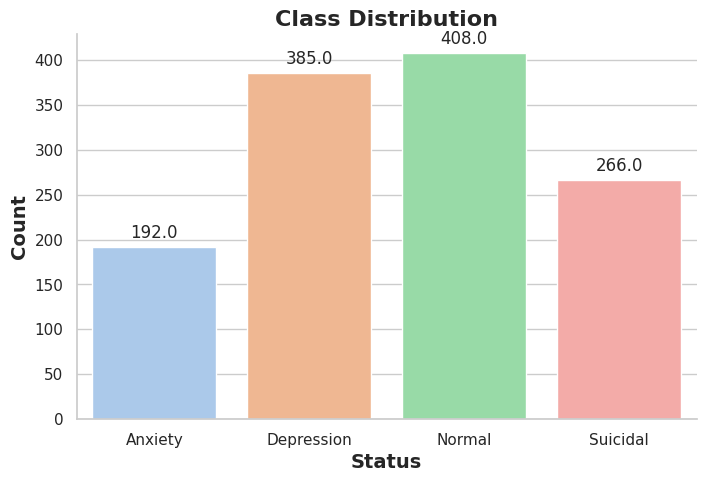

In [21]:
def plot_class_distribution(MLData, status_column='status'):
    # Set a more attractive style
    ses.set(style="whitegrid")

    #Creating the plot with a custom color palette
    mplot.figure(figsize=(8, 5)) #setting up the size of the plot
    ax = ses.countplot(x=status_column, data=MLData, palette='pastel') #it will plot the count barplot for each category of the class

    #Customizing the title and labels
    mplot.title('Class Distribution', fontsize=16, fontweight='bold') #setting up the title of the plot
    mplot.xlabel('Status', fontsize=14, fontweight='bold') #setting up the label of the x axis of the plot
    mplot.ylabel('Count', fontsize=14, fontweight='bold') #setting up the label of the y axis of the plot

    #Adding value annotations on top of the bar.
    for a in ax.patches:
        ax.annotate(f'{a.get_height()}', (a.get_x() + a.get_width() / 2., a.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

    ses.despine()

    # Show the plot
    mplot.show()

plot_class_distribution(MLData)

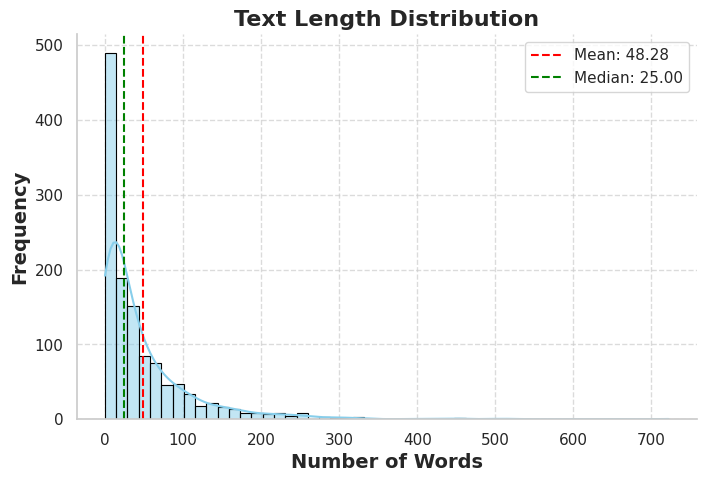

In [22]:
def plot_text_length_distribution(MLData, text_column='clean_statement'):
    #Calculate text length and add it as a new column
    MLData['text_length'] = MLData[text_column].apply(lambda x: len(x.split()))

    #Set a more attractive style
    ses.set(style="whitegrid")

    #Create the histogram plot with custom color and style
    mplot.figure(figsize=(8, 5))
    ax = ses.histplot(MLData['text_length'], bins=50, kde=True, color='skyblue', edgecolor='black')

    #Customize the title and labels
    mplot.title('Text Length Distribution', fontsize=16, fontweight='bold')
    mplot.xlabel('Number of Words', fontsize=14, fontweight='bold')
    mplot.ylabel('Frequency', fontsize=14, fontweight='bold')

    mplot.grid(True, linestyle='--', alpha=0.7)

    #Annotate the plot with descriptive statistics
    mean_length = MLData['text_length'].mean()
    median_length = MLData['text_length'].median()
    mplot.axvline(mean_length, color='red', linestyle='--', label=f'Mean: {mean_length:.2f}')
    mplot.axvline(median_length, color='green', linestyle='--', label=f'Median: {median_length:.2f}')

    #Add a legend to explain the lines
    mplot.legend()

    #Remove the top and right spines for a cleaner look
    ses.despine()

    #Show the plot
    mplot.show()

plot_text_length_distribution(MLData)

In [23]:
def plot_wordcloud(text, title):
    # Generate the word cloud with a custom color scheme
    wordcloud = WordCloud(width=1000, height=500,
                          background_color='white',
                          colormap='coolwarm',  # Change the color scheme
                          max_words=200,         # Limit the number of words
                          contour_color='black', # Add contour color for better visibility
                          contour_width=1).generate(' '.join(text))

    #Creating the plot
    mplot.figure(figsize=(12, 6))
    mplot.imshow(wordcloud, interpolation='bilinear')

    #Customize the title
    mplot.title(title, fontsize=18, fontweight='bold', color='darkblue')

    #Remove the axis
    mplot.axis('off')

    #Show the plot
    mplot.show()

In [24]:
MLData.status.unique()

array(['Anxiety', 'Depression', 'Normal', 'Suicidal'], dtype=object)

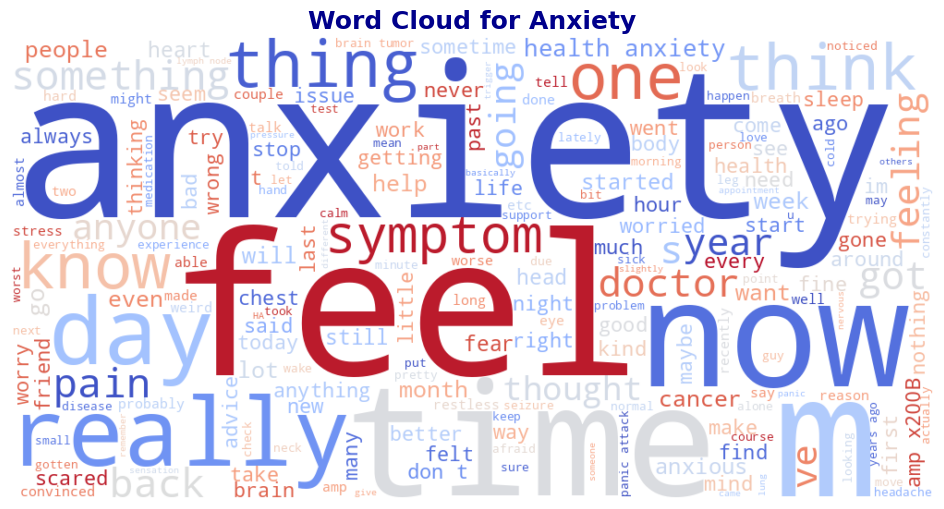

In [25]:
subset = MLData[MLData['status'] == 'Anxiety']
plot_wordcloud(subset['statement'], f'Word Cloud for Anxiety')

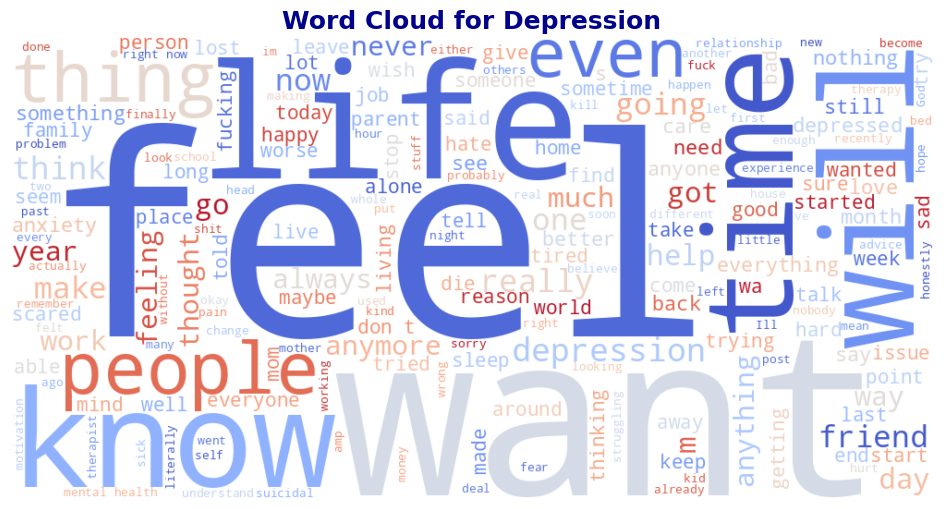

In [26]:
subset = MLData[MLData['status'] == 'Depression']
plot_wordcloud(subset['statement'], 'Word Cloud for Depression')

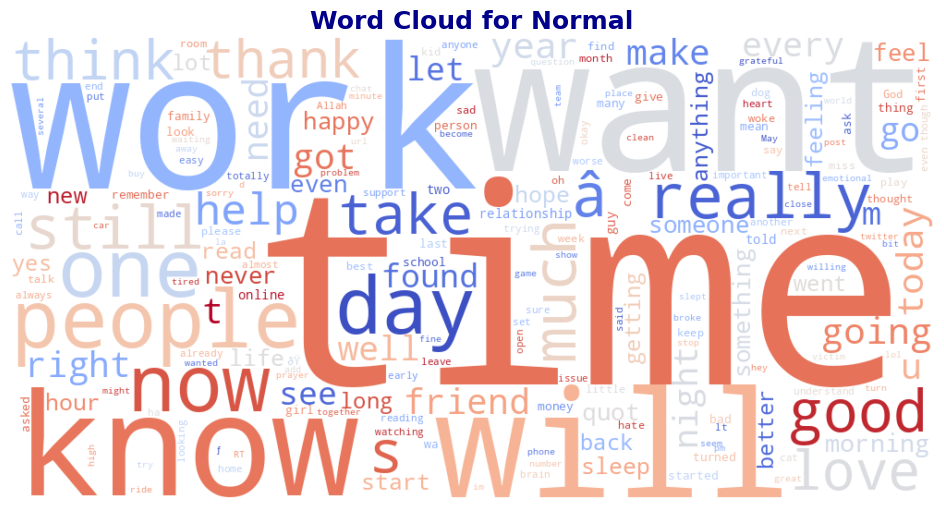

In [27]:
subset = MLData[MLData['status'] == 'Normal']
plot_wordcloud(subset['statement'], 'Word Cloud for Normal')

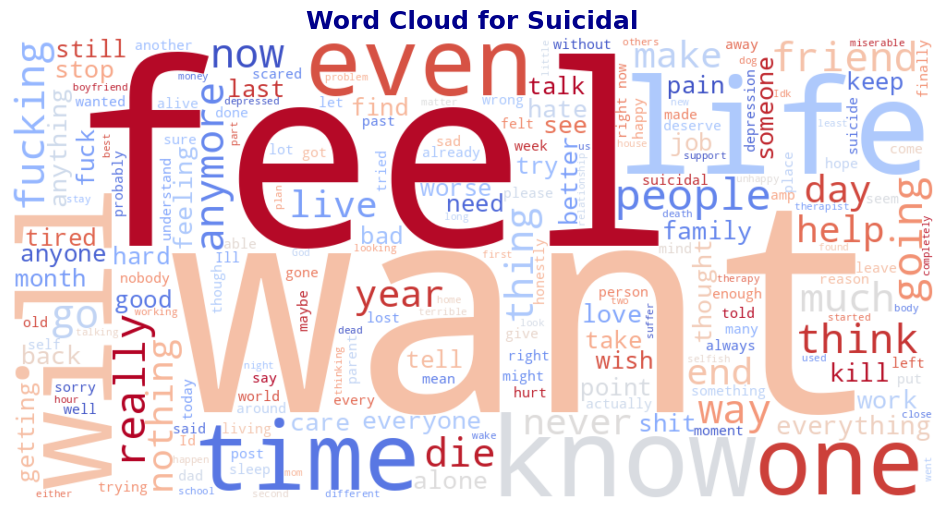

In [28]:
subset = MLData[MLData['status'] == 'Suicidal']
plot_wordcloud(subset['statement'], 'Word Cloud for Suicidal')

In [29]:
# Convert the 'status' labels to numeric using LabelEncoder
label_encoder = LabelEncoder()
MLData['status'] = label_encoder.fit_transform(MLData['status'])

In [30]:
X = MLData['clean_statement']
y = MLData['status']

This code blow shows the way of dealing with imbalanced datasets for using the fuction of `RandomOverSampler` from the `imblearn`.

 This is done first by instantiating the `RandomOverSampler` while setting the `random_state` to be a specific integer. The `fit_resample` method is then used on the input features ‘X’ and target labels ‘y’ this resamples the dataset to balance it. This method in deciding the number of samples involves copying of the minority class until it is balanced with other clases.

 Last of all, the resampled information is transformed back to `pandas` Series for a subsequent analysis or model usage. This technique assist in better performanceof the ML models particulrly in the balncing of the datasets used for training.

In [31]:
from imblearn.over_sampling import RandomOverSampler #imported the Randomoversampler for handling the imbalanced dataset

#Initializing the RandomOverSampler
oversmp = RandomOverSampler(random_state=42)

#Resample the data
Xresampled, yresampled = oversmp.fit_resample(X.values.reshape(-1, 1), y)

#Convert back to Series
X_resampled = pnds.Series(Xresampled.flatten())
y_resampled = pnds.Series(yresampled)

In [32]:
import plotly.graph_objects as plgo

# Get value counts
value_counts = y_resampled.value_counts()
# Create the pie chart
fig = plgo.Figure(data=[plgo.Pie(
    values=value_counts.values,
    hole=0.4,  # Hole size for donut chart
    textinfo='label+percent',  # Display label and percentage
    marker=dict(colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']),  # Custom colors for each class
    textfont_size=14,  # Font size of text
    automargin=True  # Auto margin to fit text
)])

# Update layout for better appearance with custom height and width
fig.update_layout(
    title_text='Distribution of Classes in Dataset',
    title_x=0.5,  # Center the title
    margin=dict(l=0, r=0, t=40, b=0),  # Adjust margins
    annotations=[dict(text='Classes', x=0.5, y=0.5, font_size=20, showarrow=False)],  # Add central text
    height=400,  # Set the height of the figure
    width=600,   # Set the width of the figure
)

# Show plot
fig.show()

In [33]:
# Split the data into training and validation sets
XTran, XTst, yTran, yTst = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, stratify=y_resampled)

In [34]:
yTran.value_counts()

,count
status,
3,286
1,286
2,285
0,285


In [35]:
yTst.value_counts()

,count
status,
0,123
2,123
1,122
3,122


This code mainly tokenizes text data based on BERT tokenizer. Here, a tokenizer object from the prepared ‘bert-base-uncased’ model is used in order to encode the texts properly; truncating and padding the tokensto a maximum of 512. The tokenized encodings along with their labels to train and validate are then made ready.

In [36]:
# Tokenize the data using BERT tokenizer
toknizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize_data(data):
    return toknizer(data.tolist(), truncation=True, padding=True, max_length=512)

TrainEncodings = tokenize_data(XTran)
ValEncodings = tokenize_data(XTst)
TrainLabels = yTran.tolist()
ValLabels = yTst.tolist()

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

This code defines a custom dataset class, `CustomDataset`, for PyTorch. The class takes tokenized encodings and labels as inputs. The `__getitem__` method returns a dictionary containing the tokenized data and its coresponding label as tensors, allowing it to be easily used by PyTorch data laders during model training. The `__len__` method returns the length of the dataset, which is the number of labels. Finaly, `train_dataset` and `val_dataset` are created using this custom class, holding the traning and validation data, respectively.

In [37]:
#Creating a Custom Dataset Class
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, ix):
        itm = {ky: torch.tensor(vl[ix]) for ky, vl in self.encodings.items()}
        itm['labels'] = torch.tensor(self.labels[ix])
        return itm

    def __len__(self):
        return len(self.labels)

TrainDataset = CustomDataset(TrainEncodings, TrainLabels)
ValDataset = CustomDataset(ValEncodings, ValLabels)

This code initializes an instance of `TrainingArguments` from the `transformers` package of the Hugging Face, which determines important variables for model training. `output_dir` decides the neighbourhood or directory other than the dataset where results are to be stored whereas `num_train_epochs` holds the number of epochs to train. These quantites, `per_device_train_batch_size` and `per_device_eval_batch_size` define the batch sizes for training and evaluation respectively. `warmup_steps` determines the step for learning rate warmup, and `weight_decay` does regularzation. The model prints infrmation every 55 steps (`logging_steps`), and its evaluation is also defined at certain steps (`eval_strategy="steps"`), while checkpoints are saved every 550 steps with the 3 best models conserved. `fp16` is used for mixed precision computation, `gradient_accumulation_steps` is used for acumulation of gradients, `load_best_model_at_end` will load the best model based on the accuracy.

In [38]:
from transformers import TrainingArguments

TrainingArgs = TrainingArguments(
    output_dir='./results',num_train_epochs=20,per_device_train_batch_size=8, per_device_eval_batch_size=8,
    warmup_steps=300,weight_decay=0.01,logging_dir='./logs',logging_steps=55,eval_strategy="steps",
    save_steps=550,save_total_limit=3, fp16=True,gradient_accumulation_steps=4,load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

In [39]:
#Initializing and Train the Model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(MLData['status'].unique()))

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [40]:
MLData.status.value_counts()

,count
status,
2,408
1,385
3,266
0,192


In [41]:
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support #imported the evaluation metrics for for
from transformers import Trainer, EarlyStoppingCallback

#Defining the compute_metrics function
def compute_metrics(p):
    logits, labels = p
    predictions = torch.argmax(torch.tensor(logits), dim=-1)
    accuracy = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    return {
        'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1
    }

In [42]:
trainer = Trainer(
    model=model, args=TrainingArgs,  train_dataset=TrainDataset,
    eval_dataset=ValDataset, compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)],  # Stop if no improvement for 3 evaluations
)

In [ ]:
trainer.train()

Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
55,1.335900,1.107711,0.589796,0.609470,0.589796,0.575969
110,0.874600,0.724479,0.706122,0.698441,0.706122,0.698002
165,0.535400,0.522527,0.791837,0.787581,0.791837,0.788071
220,0.313300,0.500171,0.822449,0.820235,0.822449,0.819080
275,0.196900,0.582215,0.834694,0.836401,0.834694,0.832861
330,0.121800,0.659225,0.840816,0.840025,0.840816,0.838042
385,0.029800,0.911624,0.842857,0.839708,0.842857,0.840373
440,0.034400,0.888074,0.840816,0.845781,0.840816,0.841301
495,0.016500,0.957300,0.848980,0.847597,0.848980,0.848163
550,0.014300,0.933707,0.851020,0.848811,0.851020,0.849558


In [ ]:
def plot_training_validation_loss(trainer):
    # Load logs
    logs = trainer.state.log_history

    # Extract loss values
    train_loss = [log['loss'] for log in logs if 'loss' in log]
    eval_loss = [log['eval_loss'] for log in logs if 'eval_loss' in log]
    # steps = [log['step'] for log in logs if 'step' in log]

    # Plot losses
    mplot.figure(figsize=(12, 6))
    mplot.plot(train_loss, label='Training Loss', color='blue')
    mplot.plot(eval_loss, label='Validation Loss', color='red')
    mplot.xlabel('Training Steps')
    mplot.ylabel('Loss')
    mplot.title('Training and Validation Loss')
    mplot.legend()
    mplot.grid(True)
    mplot.show()

# Call the function to plot loss
plot_training_validation_loss(trainer)

In [ ]:
# Evaluate the Model
results = trainer.evaluate()
print(results)

##**Results on Training Data**

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import label_binarize
import numpy as np

# Making Predictions and Calculating Metrics
def predict_and_evaluate(dataset):
    model.eval()
    predictions = []
    TrueLabels = []

    for batch in torch.utils.data.DataLoader(dataset, batch_size=8):
        with torch.no_grad():
            inputs = {key: val.to(model.device) for key, val in batch.items() if key != 'labels'}
            outputs = model(**inputs)
            logits = outputs.logits
            preds = torch.argmax(logits, dim=-1).cpu().numpy()
            labels = batch['labels'].cpu().numpy()
            predictions.extend(preds)
            TrueLabels.extend(labels)

    # Calculate metrics
    acc = accuracy_score(TrueLabels, predictions)
    preci = precision_score(TrueLabels, predictions, average='weighted')
    recal = recall_score(TrueLabels, predictions, average='weighted')
    f1 = f1_score(TrueLabels, predictions, average='weighted')
    ConfMatrix = confusion_matrix(TrueLabels, predictions)

    # Print metrics
    print('Accuracy: ', acc)
    print('Precision: ', preci)
    print('Recall: ', recal)
    print('F1 Score: ',f1)
    print("===========================================================================")
    # Plot Confusion Matrix Heatmap
    mplot.figure(figsize=(7, 5))
    ses.heatmap(ConfMatrix, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    mplot.xlabel('Predicted')
    mplot.ylabel('True')
    mplot.title('Confusion Matrix Heatmap')
    mplot.show()
    print("===========================================================================")
    # Classification Report
    report = classification_report(TrueLabels, predictions)
    print("Classification Report:")
    print(report)

    print("===========================================================================")
    # Binarize the output for ROC AUC
    truelabelsbin = label_binarize(TrueLabels, classes=np.arange(len(label_encoder.classes_)))
    predictionsbin = label_binarize(predictions, classes=np.arange(len(label_encoder.classes_)))

    # ROC AUC Curve for each class
    mplot.figure(figsize=(7, 5))
    for i in range(len(label_encoder.classes_)):
        fpr, tpr, _ = roc_curve(truelabelsbin[:, i], predictionsbin[:, i])
        mplot.plot(fpr, tpr, label=f'Class {label_encoder.classes_[i]} (AUC = {roc_auc_score(truelabelsbin[:, i], predictionsbin[:, i]):.2f})')

    mplot.xlabel('False Positive Rate')
    mplot.ylabel('True Positive Rate')
    mplot.title('ROC Curve for Each Class')
    mplot.legend(loc='best')
    mplot.show()

predict_and_evaluate(TrainDataset)

##**Results on Testing Data**

In [ ]:
predict_and_evaluate(ValDataset)